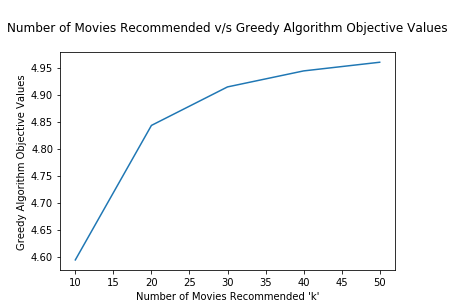

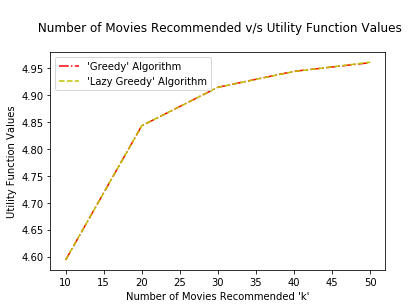

In [1]:
#READING IN DATASET TO A PIVOT TABLE WHERE COLUMNS=USERID ROWS=MOVIEID and THEIR
#INTERSECTION GIVE THE MOVIE RATING BY THE CORRESPOIND USER. 0= NO RATING GIVEN!
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

def createCharacteristicMatrix(filename):

	# convert the ratings data file to a pandas dataframe and and then convert the dataframe into the required numpy matrix and return the matrix
    data_frame = pd.read_csv(filename, sep="::", usecols = [0, 1, 2], names = ['userID', 'movieID', 'rating'], engine = 'python')
    data_mat = np.array(data_frame.pivot(index = 'movieID', columns = 'userID', values = 'rating'))
    data_mat_rev = np.nan_to_num(data_mat)
    return data_mat_rev.astype(int)
ds=createCharacteristicMatrix('../input/ratings.dat')
movies=ds.shape[0]
users=ds.shape[1]
K=[10,20,30,40,50]
greedy_obj_value=[]
greedy_recommend_movie=[]
# define the utility function
def F(A):
    if len(A) > 0:
        X_j = ds[list(A)]
        F = float(np.sum(np.amax(X_j, axis = 0)))/float(users)
    else:
        F = 0
    return F
for k in K:
    A_greedy=set([])
    for i in range(k):
        e_opt = np.argmax([F(A_greedy.union(set([e]))) - F(A_greedy) for e in range(movies)])
        A_greedy = A_greedy.union(set([e_opt]))
    # add the recommended movies to the list of recommended movies
    greedy_recommend_movie.append(A_greedy)
    
    # append objective values to the list of objective values
    greedy_obj_value.append(F(A_greedy))
plt.title("\nNumber of Movies Recommended v/s Greedy Algorithm Objective Values\n")    
plt.xlabel("Number of Movies Recommended 'k'")
plt.ylabel("Greedy Algorithm Objective Values")
plt.plot(K, greedy_obj_value)
plt.show()

# list to hold the objective value of the greedy algorithm
lazy_greedy_objective_value_list = []

# list to hold the recommended movies
lazy_recommended_movies = []

# for each cardinality value
for k in K:
    
    # empty list of recommended movies 
    A_lazy_greedy = set([])
    
    # loop over the cardinality value
    for i in range(k):
        
        if i == 0:
            
            # list of marginals 
            marginal_values_list = [F(A_lazy_greedy.union(set([e]))) - F(A_lazy_greedy) for e in range(movies)]
            
            # find the movie index that gives maximum coverage, i.e., maximum F(A)
            e_opt = np.argmax(marginal_values_list)
        
            # update the list of recommended movies
            A_lazy_greedy = A_lazy_greedy.union(set([e_opt]))
            
            # sort the list of marginals and remove the first element
            marginal_values_list_sorted = sorted(marginal_values_list)[::-1][1:]
            
            # sort according to the index of movies 
            movie_index_sorted = list(np.argsort(marginal_values_list))[::-1][1:]
            
        else:
            
            # check if delta(e2|A_i) > delta(e3|A_i-1) 
            while (F(A_lazy_greedy.union(set([movie_index_sorted[0]]))) - F(A_lazy_greedy)) < marginal_values_list_sorted[1]:
                
                # update the list of marginals
                marginal_values_list[movie_index_sorted[0]] = F(A_lazy_greedy.union(set([movie_index_sorted[0]]))) - F(A_lazy_greedy)
                
                # sort the list of marginals
                marginal_values_list_sorted = sorted(marginal_values_list)[::-1]
                
                # sort according to the index of movies
                movie_index_sorted = list(np.argsort(marginal_values_list))[::-1]
            
            # update list of recommended movies
            A_lazy_greedy = A_lazy_greedy.union(set([movie_index_sorted[0]]))
            
            # sort the list of marginals and remove the first element
            marginal_values_list_sorted = sorted(marginal_values_list)[::-1][1:]
            
            # sort according to the index of movies
            movie_index_sorted = list(np.argsort(marginal_values_list))[::-1][1:]
        
    # add the recommended movies to the list of recommended movies
    lazy_recommended_movies.append(A_lazy_greedy)
    
    # append objective values to the list of objective values
    lazy_greedy_objective_value_list.append(F(A_lazy_greedy))
    
plt.title("\n Number of Movies Recommended v/s Utility Function Values\n")    
plt.xlabel("Number of Movies Recommended 'k'")
plt.ylabel("Utility Function Values")
plt.plot(K, greedy_obj_value, label = "'Greedy' Algorithm", linestyle = '-.', color = 'r')
plt.plot(K, lazy_greedy_objective_value_list, label = "'Lazy Greedy' Algorithm", linestyle = '--', color = 'y')
plt.legend()
plt.show()